In [76]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [77]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.09189092 0.23727093 0.61939409 ... 0.49603054 0.41818655 0.61518444]
 [0.09078245 0.23440876 0.61192242 ... 0.49004699 0.41314201 0.60776354]
 [0.01182244 0.03052664 0.07968958 ... 0.06381796 0.05380276 0.07914798]
 ...
 [0.1340315  0.34608185 0.90344423 ... 0.72350696 0.6099642  0.89730406]
 [0.12454968 0.32159889 0.83953166 ... 0.67232372 0.56681336 0.83382585]
 [0.02243833 0.05793787 0.15124639 ... 0.12112293 0.10211464 0.15021846]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.13528653  0.18468204  0.87997815 ...  0.53987801  0.43939906
   0.79913312]
 [ 0.01934356  0.37325986  0.62374182 ...  0.41138513  0.43368398
   0.3652555 ]
 [-0.05238392  0.0842927   0.11938241 ...  0.08417664  0.14757382
   0.28046568]
 ...
 [ 0.21074809  0.3078271   0.77120637 ...  0.81758635  0.59767712
   0.9771942 ]
 [ 0.23436018  0.30476323  0.79281777 ...  0.35315194  0.63968959
   0.57332309]
 [ 0.04202418 -0.00803367  0.21484479 ...  0.1880973   0.24787817
  -0.05

In [78]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [79]:
mycebmf=  cEBMF(data= noisy_matrix) 

 

In [80]:
mycebmf.initialize()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([ 0.1700, -0.1748, -0.0037, -0.0432,  0.1662,  0.0393,  0.1030, -0.2609,
        -0.1864,  0.0823,  0.3958, -0.1847,  0.1054,  0.2521, -0.0137, -0.1207,
        -0.3817,  0.3811,  0.2206,  0.0088,  0.0444,  0.2176, -0.0251, -0.0941,
        -0.1428, -0.0364, -0.0798,  0.1134, -0.0694,  0.0060, -0.0465, -0.0297,
        -0.1772, -0.2257,  0.1936,  0.2134, -0.0550, -0.2328, -0.1265,  0.1115,
        -0.3031,  0.3771,  0.1684,  0.1811, -0.0541, -0.0247, -0.0160,  0.2494,
        -0.2808,  0.0087])
tensor([ 0.1079, -0.2405,  0.0478,  0.0311, -0.1289,  0.1586, -0.1207, -0.0531,
         0.0007,  0.2288, -0.0692,  0.2411, -0.1247, -0.0487,  0.0523, -0.0014,
         0.2097, -0.0228, -0.0011,  0.1176,  0.0610,  0.0065, -0.3500,  0.2548,
        -0.0175, -0.0160,  0.0881, -0.1075, -0.2919, -0.0108,  0.0525,  0.0823,
         0.1779, -0.0079, -0.0808, -0.2230, -0.0591,  0.0729, -0.2123,  0.4756])


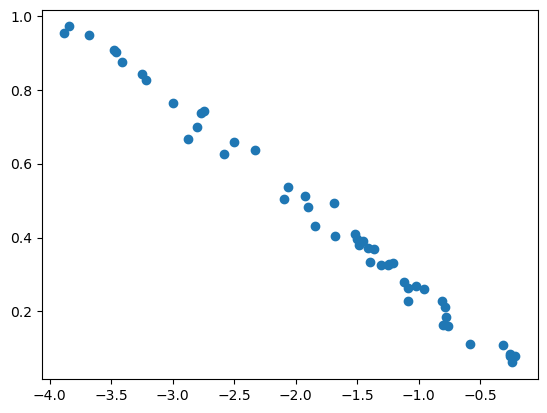

In [81]:
plt.scatter( mycebmf.L[:,0],u)

In [82]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

tensor([[ 0.1225,  0.2670,  0.6996,  ...,  0.5659,  0.4564,  0.6985],
        [ 0.0772,  0.2525,  0.5889,  ...,  0.4911,  0.4268,  0.5196],
        [-0.0013,  0.0387,  0.0727,  ...,  0.0506,  0.0476,  0.0709],
        ...,
        [ 0.1566,  0.3210,  0.9180,  ...,  0.7599,  0.5951,  0.9547],
        [ 0.1454,  0.3796,  0.8233,  ...,  0.6777,  0.6096,  0.6746],
        [ 0.0678,  0.0616,  0.1779,  ...,  0.1573,  0.1273,  0.1590]])

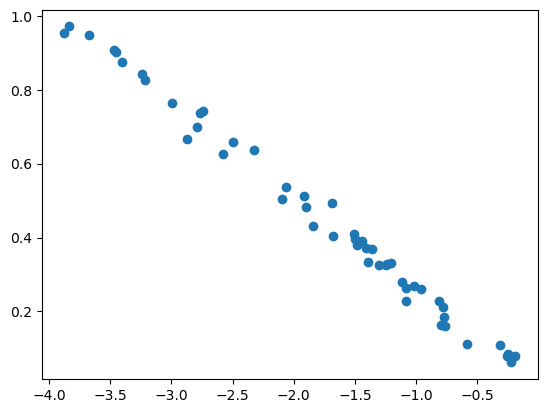

In [83]:
plt.scatter( mycebmf.L[:,0],u)

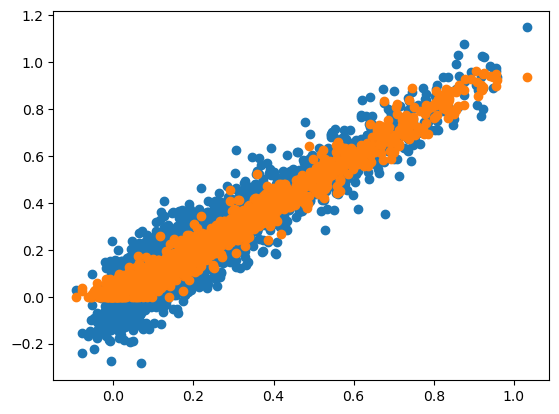

In [84]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [85]:
mycebmf.fit()

Converged after 67 iterations.
Converged after 54 iterations.
Converged after 68 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 67 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
Converge

CEBMFResult(L=tensor([[-2.8011,  0.0000,  0.0000,  0.0000,  0.0000],
        [-2.4317,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.2245,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.4488,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.1524,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.7913,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.4112,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.6452,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.4660,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.0585,  0.0000,  0.0000,  0.0000,  0.0000],
        [-3.1343,  0.0000,  0.0000,  0.0000,  0.0000],
        [-2.5125,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.1798,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.2726,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.6388,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.2097,  0.0000,  0.0000,  0.0000,  0.0000],
        [-2.7256,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.2253,  0.0000,  0.0000,  0.0000,  0.000

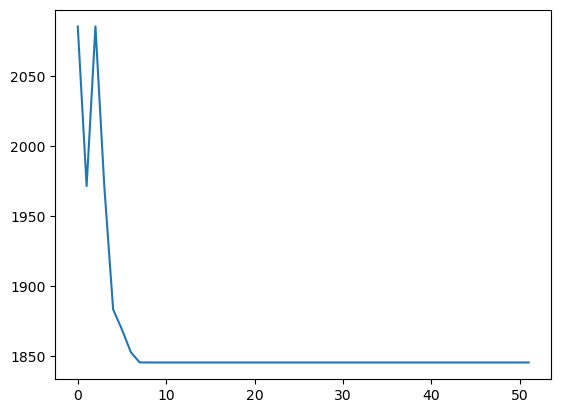

In [86]:
plt.plot(mycebmf.obj)

tensor(0.0001, dtype=torch.float64)

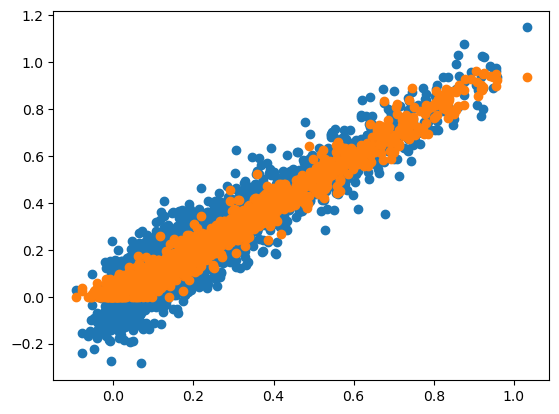

In [87]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [ ]:
results =[]
for i in range(40):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix) 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 